In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-1e4a0b7ca604>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/tsla.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


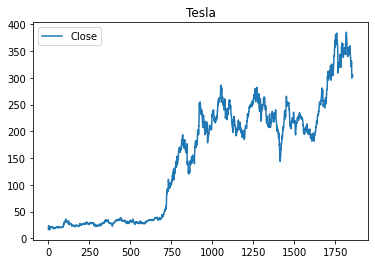

In [5]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

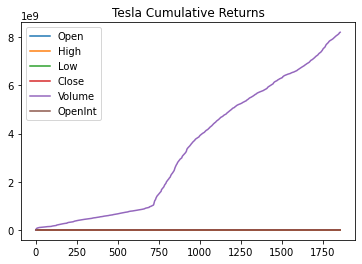

In [6]:
dr=df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation Plot')

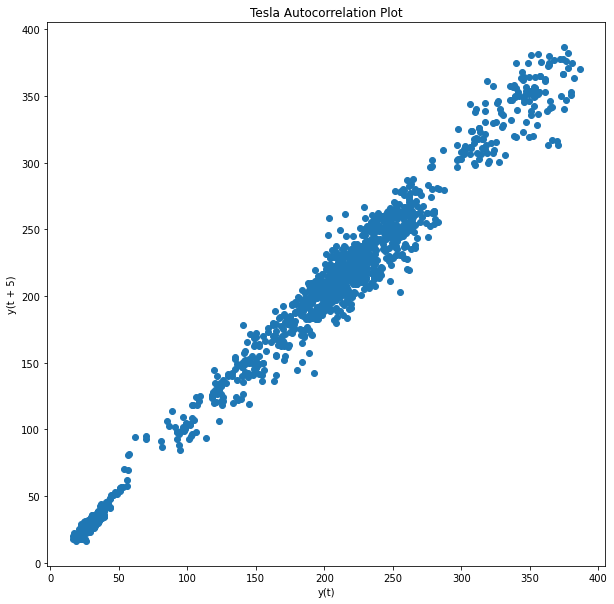

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation Plot')

In [8]:
df['Date'][1857]

'2017-11-10'

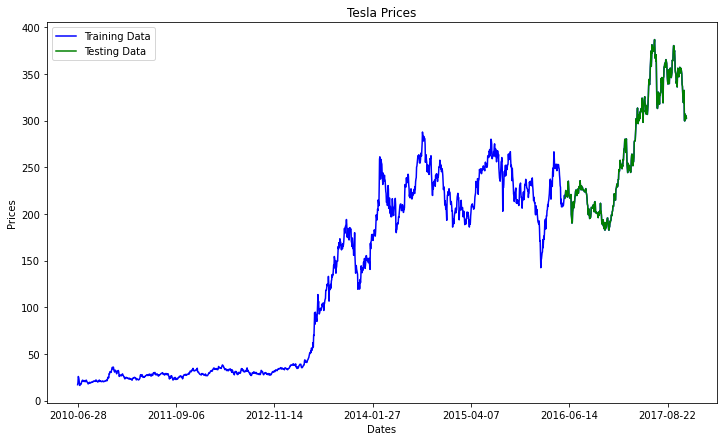

In [9]:
train_data, test_data=df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
  return np.mean((np.abs(y_pred-y_true) *200/ (np.abs(y_pred)+np.abs(y_true))))

In [11]:
train_ar=train_data['Open'].values
test_ar=test_data['Open'].values
history=[x for x in train_ar]
print(type(history))
predictions=list()
for t in range(len(test_ar)):
  model=ARIMA(history, order=(5,1,0))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test_ar[t]
  history.append(obs)
error=mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f'% error)
error2=smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' %error2)

<class 'list'>
Testing Mean Squared Error: 40.550
Symmetric mean absolute percentage error: 26.015


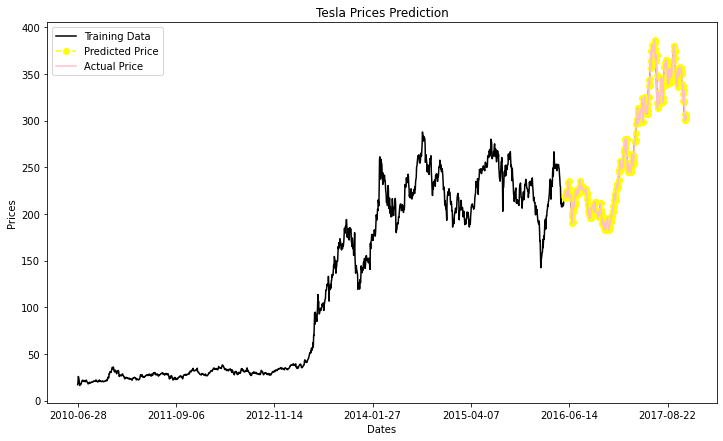

In [12]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='black', label='Training Data')
plt.plot(test_data.index, predictions, color='yellow', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='pink', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0, 1857, 300), df['Date'][0:1857:300])
plt.legend()

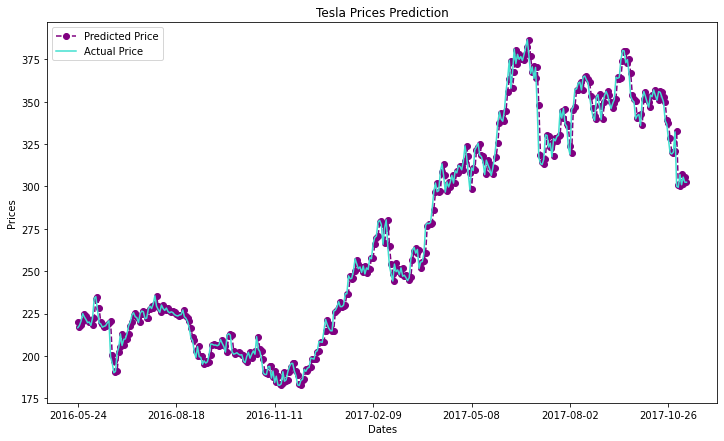

In [13]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='purple', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='turquoise', label='Actual Price')
plt.xticks(np.arange(1486, 1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# **Microsoft Stock Market Analysis**

In [14]:
df=pd.read_csv("/content/msft.us.txt").fillna(0)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


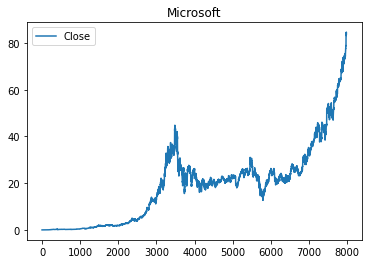

In [15]:
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

Text(0.5, 1.0, 'Microsoft Cumulative Returns')

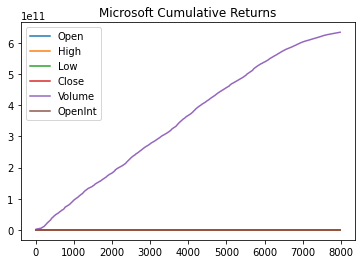

In [16]:
dr=df.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

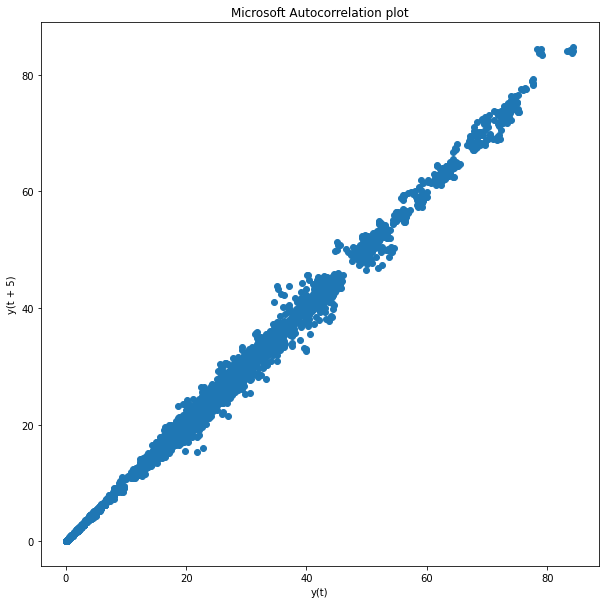

In [17]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

# **ARIMA(AutoRegressive Intergrated Moving Average)for time series prediction**

In [18]:
df['Date'][7982]

'2017-11-10'

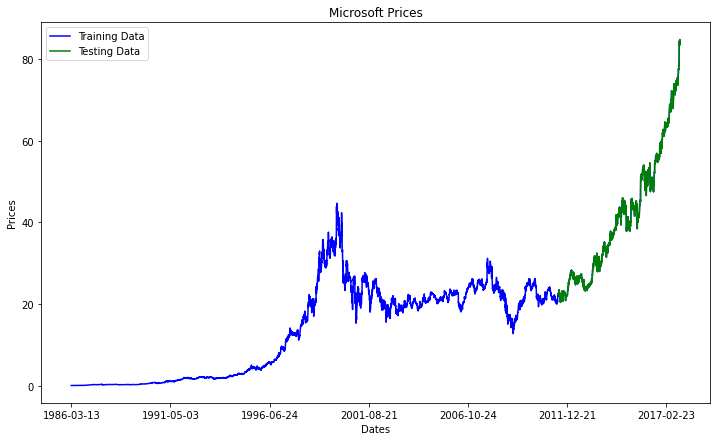

In [22]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'],'blue',label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [23]:
def smape_kun(y_true, y_pred):
  return np.mean((np.abs(y_pred-y_true)*200/ (np.abs(y_pred)*np.abs(y_true))))

In [26]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.343
Symmetric mean absolute percentage error: 2.253


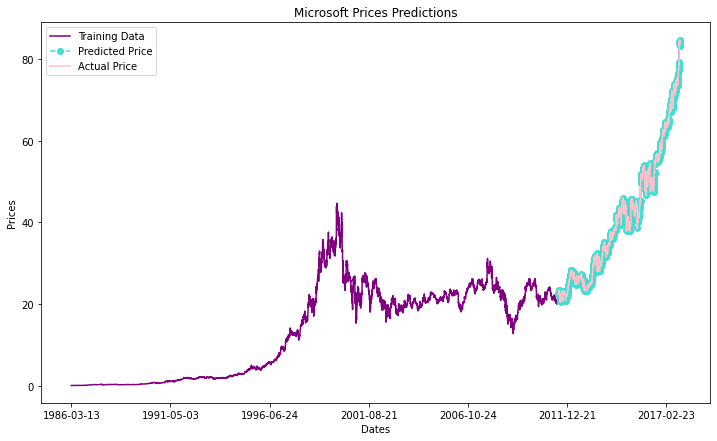

In [30]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='purple', label='Training Data')
plt.plot(test_data.index, predictions, color='turquoise', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='pink', label='Actual Price')
plt.title('Microsoft Prices Predictions')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982,1300), df['Date'][0:7982:1300])
plt.legend()

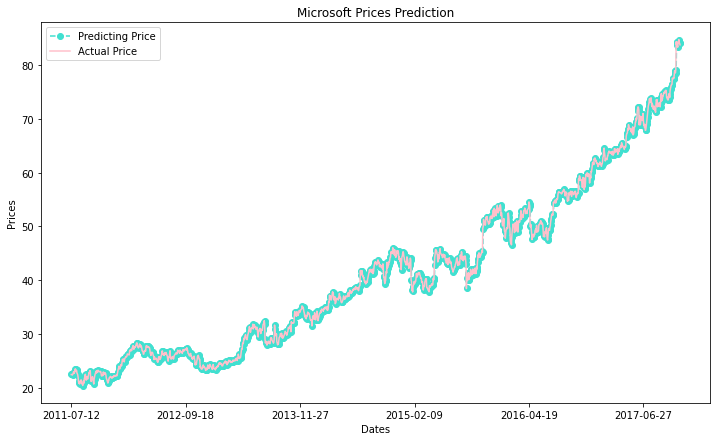

In [29]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='turquoise', marker='o', linestyle='dashed',
         label='Predicting Price')
plt.plot(test_data.index, test_data['Open'], color='pink', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(6386, 7982, 300), df['Date'][6386:7982:300])
plt.legend()